In [ ]:
# Data collection
import pandas as pd

#Load the dataset
file_path="C:\Projects\CipherSchools Data Science Project\cleaned_mall_customers.csv"
# converting the data into a dataframe
data=pd.read_csv(file_path)
# the dataset is already clean so there is no need of cleaning the data, but for the safer side, I am performing data cleaning if the dataset contains any null values in it.
#display the first few rows of the dataset
print(data.head(10))
count=data.isnull().sum()
print(count)
mean_age=data["Age"].mean()
data["Age"].fillna(mean_age,inplace=True)
print(data.head())
#changing the names of columns of data frame
data.columns=["CustomerID","Gender","Age","AnnualIncome","SpendingScore"]
print(data)

In [ ]:
#data transformation i.e. categorical variables
mode_gender=data['Gender'].mode()[0]
count=data.isnull().sum()
print(count)
data["Gender"].fillna(mode_gender,inplace=True)
data["Gender"]=data["Gender"].map({'Male': 0, 'Female':1})
print(data.describe())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#histplot-Age,Annual income,Spending score
# Visualizing distributions
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
# Annual Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['AnnualIncome'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()

In [ ]:
# Spending Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['SpendingScore'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()

In [ ]:
# Visualizing relationships
# Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Gender')
plt.title('Income vs Spending Score')
plt.show()

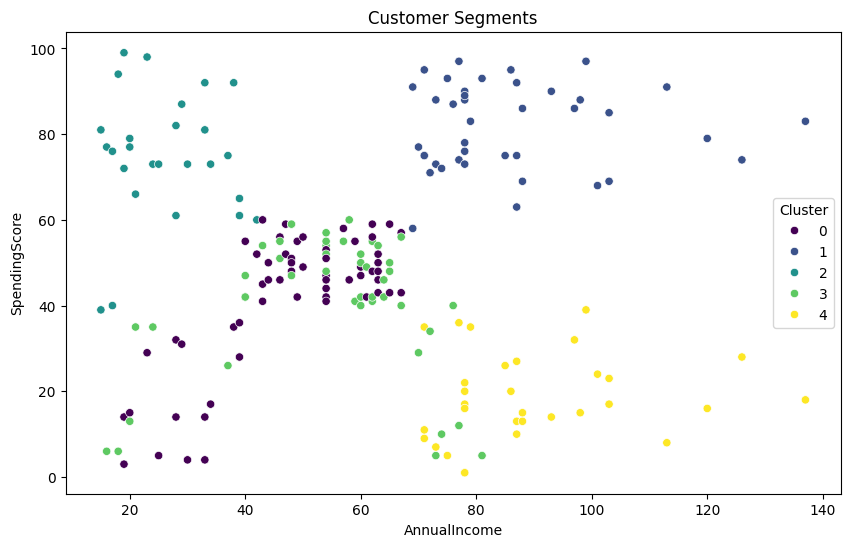

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature selection
features = data[['Age', 'AnnualIncome', 'SpendingScore']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluating cluster quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()